In [1]:
# Shoe Review Classifier

# This project classifies Amazon shoe reviews into one of four categories: **sneakers**, **boots**, **heels**, and **sandals** based on the review text.

### Key Objectives:
 # - Preprocess raw product review text using NLP techniques
# - Train and evaluate classification models
# - Save the best-performing model for deployment
# - Prepare the model for live use in a Streamlit app

### 🛠️ Tools & Libraries Used:
 # - Python, pandas, matplotlib, seaborn
 # - Scikit-learn (for modeling)
 # - NLTK (for text preprocessing)
 # - Joblib (for model saving)


In [2]:
# NLTK downloads necessary 

import nltk
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/reedburch/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/reedburch/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Load and Clean data

import pandas as pd

df = pd.read_csv('amazon_uk_shoes_products_dataset_2021_12.csv')

# Select and clean relevant columns
df_clean = df[['review_text', 'product_name']].dropna()
df_clean = df_clean.rename(columns={
    'review_text': 'review',
    'product_name': 'shoe_type'
})
df_clean['shoe_type'] = df_clean['shoe_type'].str.lower()
df_clean = df_clean[df_clean['shoe_type'].str.contains('sneaker|boot|heel|sandal', na=False)]
df_clean['shoe_type'] = df_clean['shoe_type'].apply(lambda x:
    'sneaker' if 'sneaker' in x else
    'boot' if 'boot' in x else
    'heel' if 'heel' in x else
    'sandal'
)

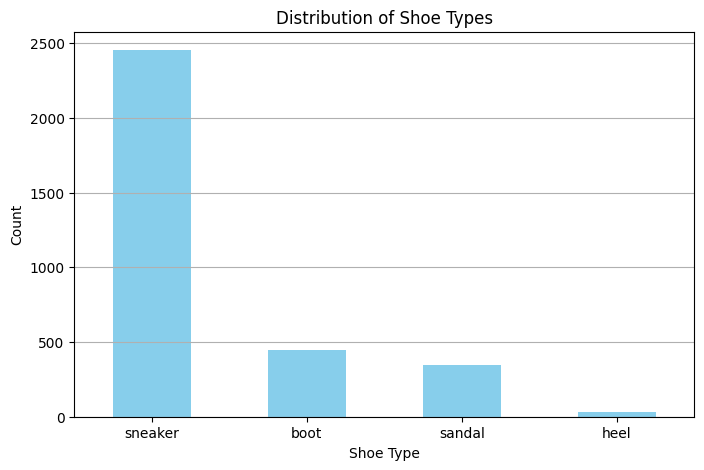

In [4]:
# Visualize Class Distribution

import matplotlib.pyplot as plt

label_counts = df_clean['shoe_type'].value_counts()
plt.figure(figsize=(8,5))
label_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Shoe Types")
plt.xlabel("Shoe Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

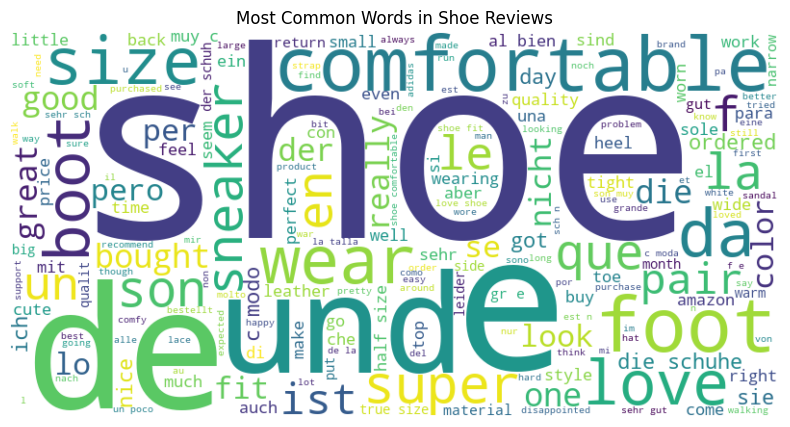


Logistic Regression Classification Report:
               precision    recall  f1-score   support

        boot       0.86      0.22      0.35        87
        heel       1.00      0.25      0.40         4
      sandal       0.50      0.06      0.11        77
     sneaker       0.77      0.99      0.87       488

    accuracy                           0.77       656
   macro avg       0.78      0.38      0.43       656
weighted avg       0.75      0.77      0.71       656



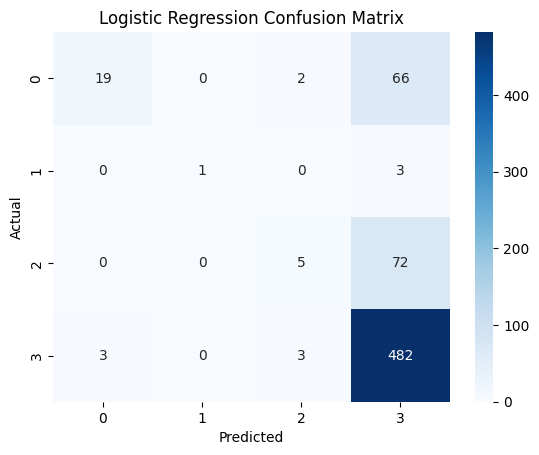


Random Forest Classification Report:
               precision    recall  f1-score   support

        boot       0.74      0.32      0.45        87
        heel       1.00      0.25      0.40         4
      sandal       0.65      0.22      0.33        77
     sneaker       0.80      0.97      0.87       488

    accuracy                           0.79       656
   macro avg       0.80      0.44      0.51       656
weighted avg       0.77      0.79      0.75       656



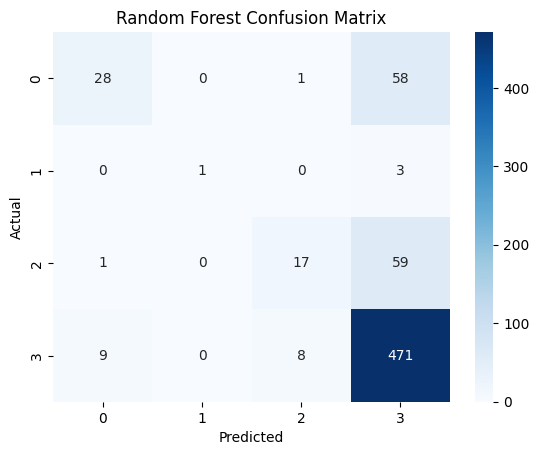

['model/vectorizer.pkl']

In [5]:
# NLP and wordcloud and modeling done here

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import joblib
import os

# Clean function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text.lower())
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

# Apply cleaning
df_clean['cleaned_review'] = df_clean['review'].apply(clean_text)

# Word cloud
text = ' '.join(df_clean['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Shoe Reviews")
plt.show()

# Vectorize
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_clean['cleaned_review'])
y = df_clean['shoe_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"\n{name} Classification Report:\n", classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    results[name] = model

# Save best model
os.makedirs("model", exist_ok=True)
joblib.dump(results['Logistic Regression'], 'model/logreg_model.pkl')
joblib.dump(vectorizer, 'model/vectorizer.pkl')


In [6]:
## Summary

# This notebook demonstrates a full end-to-end machine learning workflow:
# - Cleaned and prepared real-world product review data
# - Preprocessed text using NLTK
# - Vectorized input using TF-IDF
# - Compared two classification models and visualized their performance
# - Saved the best model for live deployment